In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [93]:
#Displaying first 5 records of terrorism data from the year 1970

#Reading global crime csv
terror_data = pd.read_csv('C:\\Users\\deepa\\OneDrive\\Documents\\Data Analytics Case Study\\Capstone_2\\global_terrorism_data.csv',encoding='ISO-8859-1',low_memory=False)

#Cleaning Data, rename columns
terror_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                            'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                            'nkill':'Fatalities','nwound':'Injuries',
                            'summary':'Summary','gname':'Group',
                            'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

# convert fatalities and injuries column to integer and fill NA columns with 0
terror_data['Fatalities'] = terror_data['Fatalities'].fillna(0).astype(int)
terror_data['Injuries'] = terror_data['Injuries'].fillna(0).astype(int)

#terror_data=terror_data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Fatalities','Injuries','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror_data=terror_data[['Year','Month','Day','Country','Region','city','AttackType','Fatalities','Injuries','Target','Target_type','Weapon_type']]
terror_data ['Casualities'] = terror_data['Fatalities']+terror_data['Injuries']

terror_data.head(5)

,Year,Month,Day,Country,Region,city,AttackType,Fatalities,Injuries,Target,Target_type,Weapon_type,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,1,0,Julio Guzman,Private Citizens & Property,Unknown,1
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",Government (Diplomatic),Unknown,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,1,0,Employee,Journalists & Media,Unknown,1
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,0,0,U.S. Embassy,Government (Diplomatic),Explosives,0
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,0,0,U.S. Consulate,Government (Diplomatic),Incendiary,0


In [85]:
print('KEY INSIGHTS')
print('Country with Highest Terrorist Attacks:',terror_data['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror_data['Region'].value_counts().index[0])
print('Maximum people Killed in an attack are:',terror_data['Fatalities'].max(),'that took place in',terror_data.loc[terror_data['Fatalities'].idxmax()].Country)
print('Maximum people Injured in an attack are:',terror_data['Injuries'].max(),'that took place in',terror_data.loc[terror_data['Injuries'].idxmax()].Country)


KEY INSIGHTS
Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people Killed in an attack are: 1570 that took place in Iraq
Maximum people Injured in an attack are: 8191 that took place in United States


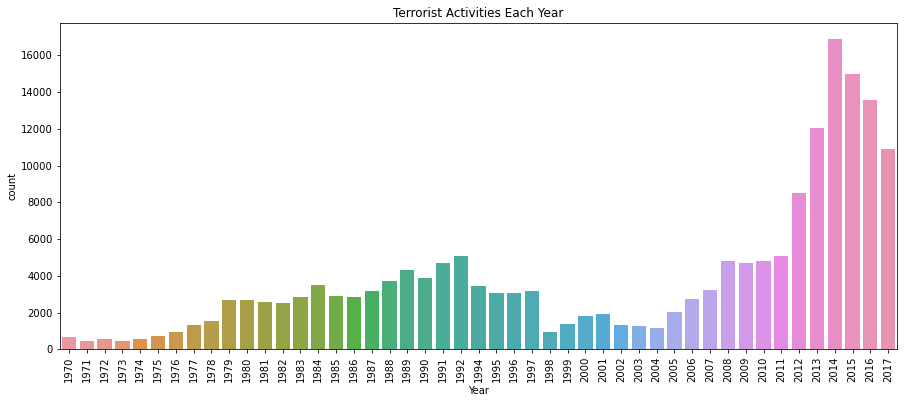

In [60]:
#Display the number of terrorist activities per year

#increase width of the plot
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_data)
plt.xticks(rotation=90)
plt.title('Terrorist Activities Each Year')
plt.show()

In [86]:
print('KEY INSIGHTS')
print('The number of terrorist attacks have clearly seen an increase from about ~650 in the year 1970 to ~11000 in 2017 with the highest number of attacks of ~17000 in 2014')

KEY INSIGHTS
The number of terrorist attacks have clearly seen an increase from about ~650 in the year 1970 to ~11000 in 2017 with the highest number of attacks of ~17000 in 2014


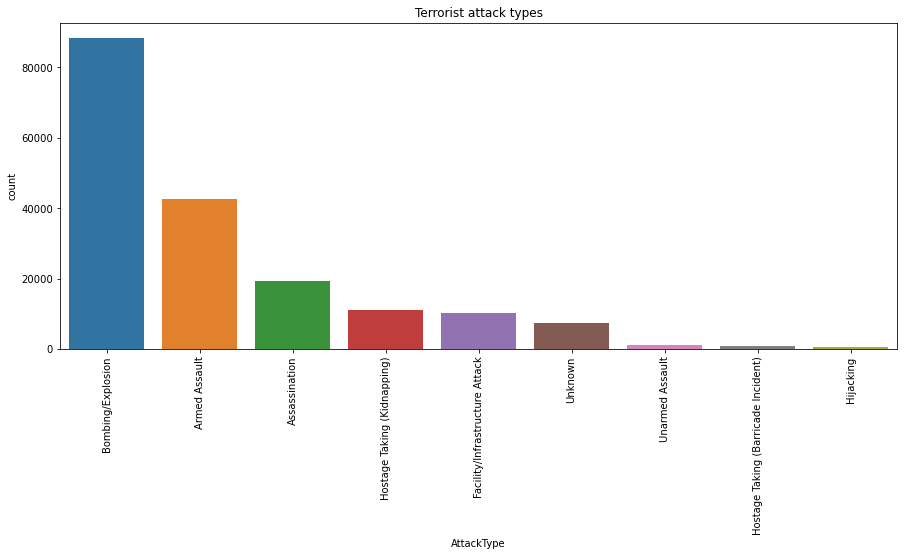

In [59]:
#Display the attack types in descending order
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror_data,order=terror_data['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorist attack types')
plt.show()

In [88]:
print('KEY INSIGHTS')
print('The most number of terrorist attacks have happened by Bombing/Explosion which contributes to almost ~48% of the total attack types ')

KEY INSIGHTS
The most number of terrorist attacks have happened by Bombing/Explosion which contributes to almost ~48% of the total attack types 


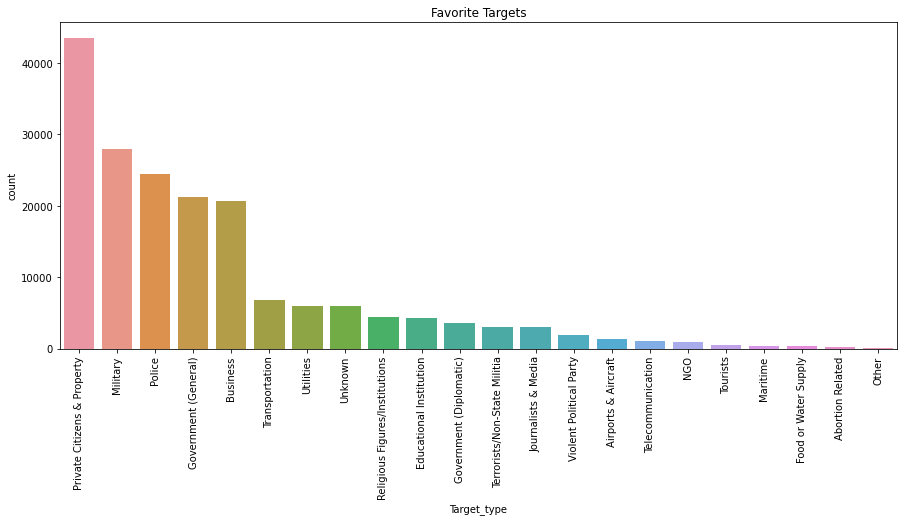

In [63]:
#Display the highest number of attacks based on target locations
plt.subplots(figsize=(15,6))
sns.countplot(terror_data['Target_type'],order=terror_data['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

In [89]:
print('KEY INSIGHTS')
print('The highest number of attacks have been on the Private Citizen and Property location which contribute to about 24% of the total attacks')

KEY INSIGHTS
The highest number of attacks have been on the Private Citizen and Property location which contribute to about 24% of the total attacks


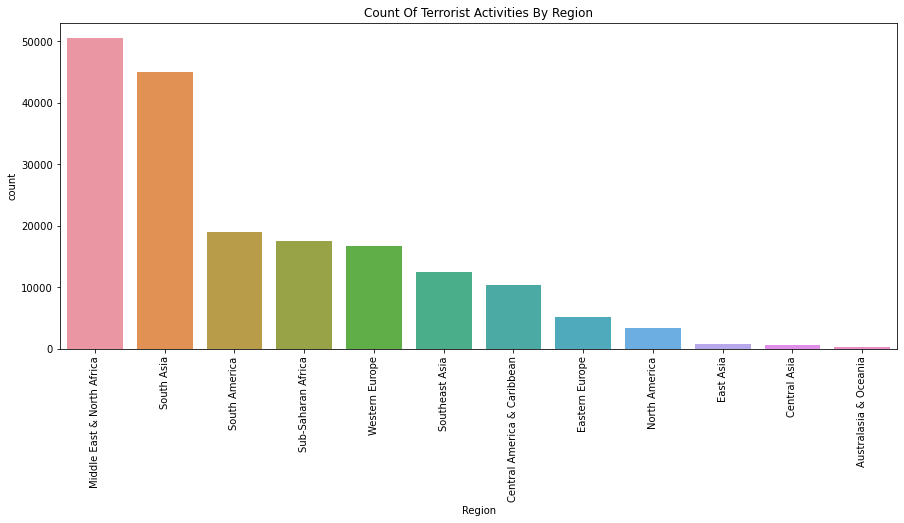

In [71]:
#Display terrorism by region
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror_data,order=terror_data['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count Of Terrorist Activities By Region')
plt.show()

In [90]:
print('KEY INSIGHTS')
print('Middle East annd North Africa have reported the highest number of attacks between 1970 nand 2017')

KEY INSIGHTS
Middle East annd North Africa have reported the highest number of attacks between 1970 nand 2017


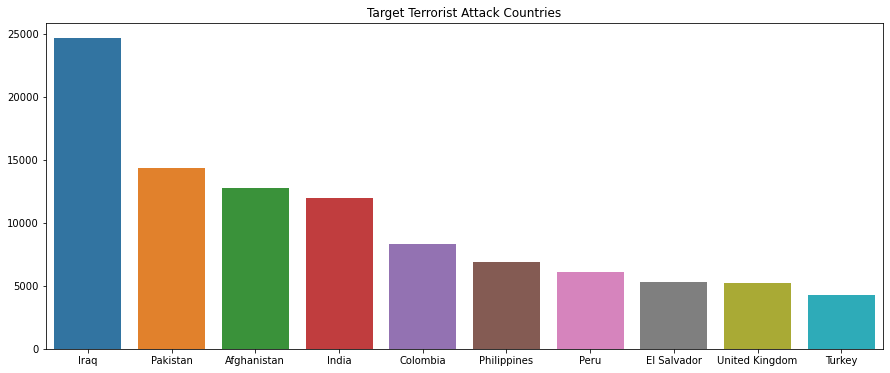

In [72]:
#Display count of terrorist attacks by country
plt.subplots(figsize=(15,6))
sns.barplot(x=terror_data['Country'].value_counts().index[:10],y=terror_data['Country'].value_counts().values[:10])
plt.title('Target Terrorist Attack Countries')
plt.show()

In [91]:
print('KEY INSIGHTS')
print('Iraq ranks the highest in terms of the country that is targeted the most for terrorist attacks between 1970 nand 2017')

KEY INSIGHTS
Iraq ranks the highest in terms of the country that is targeted the most for terrorist attacks between 1970 nand 2017


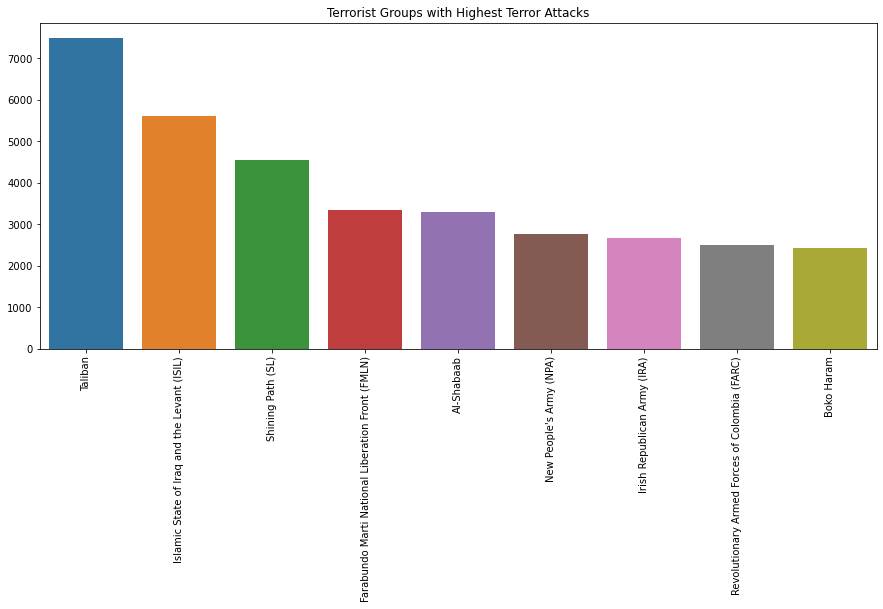

In [77]:
#Displat top 10 groups of terrorist attacks
plt.subplots(figsize=(15,6))
#Starting from 1 for the below index and values because there are more groups with 'Unknown' Group Name
sns.barplot(x=terror_data['Group'].value_counts().index[1:10],y=terror_data['Group'].value_counts().values[1:10])
plt.xticks(rotation=90)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

In [92]:
print('KEY INSIGHTS')
print('Taliban terrorist group is the top terrorist group between 1970 nand 2017')

KEY INSIGHTS
Taliban terrorist group is the top terrorist group between 1970 nand 2017


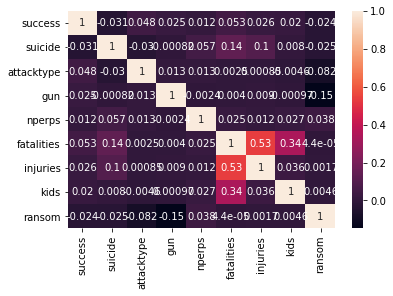

In [78]:
terror_data = pd.read_csv('C:\\Users\\deepa\\OneDrive\\Documents\\Data Analytics Case Study\\Capstone_2\\global_terrorism_data.csv',encoding='ISO-8859-1',low_memory=False)
#renaming columns
terror_data = terror_data_full.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'targtype1':'target',
             'weaptype1':'weapon', 'nkill':'fatalities', 'nwound':'injuries','attacktype1':'attacktype','guncertain1':'gun','nhostkid':'kids'})
#Finding the correlation 
corr = terror_data.drop(['id','year','month','day','approxdate','extended','resolution','country','region','region_txt','state','city','latitude','longitude','specificity','vicinity','location','summary','crit1','crit2','crit3','doubtterr','alternative','alternative_txt','multiple','attacktype1_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','target','targsubtype1','targsubtype1_txt','corp1','target1','natlty1','natlty1_txt','targtype2','targtype2_txt','targsubtype2','targsubtype2_txt','corp2','target2','natlty2','natlty2_txt','targtype3','targtype3_txt','targsubtype3','targsubtype3_txt','corp3','target3','natlty3','natlty3_txt','gname','gsubname','gname2','gsubname2','gname3','gsubname3','motive','guncertain2','guncertain3','individual','nperpcap','claimed','claimmode','claimmode_txt','claim2','claimmode2','claimmode2_txt','claim3','claimmode3','claimmode3_txt','compclaim','weapon','weapsubtype1','weapsubtype1_txt','weaptype2','weaptype2_txt','weapsubtype2','weapsubtype2_txt','weaptype3',
                       'weaptype3_txt','weapsubtype3','weapsubtype3_txt', 'weaptype4','weaptype4_txt','weapsubtype4',
                       'weapsubtype4_txt','weapdetail','nkillus','nkillter','nwoundus','nwoundte','property','propextent',
                       'propextent_txt','propvalue',
                       'propcomment','ishostkid','nhostkidus','nhours','ndays','divert','kidhijcountry','ransomamt','ransomamtus','ransompaid','ransompaidus',
                       'ransomnote','hostkidoutcome',
                       'hostkidoutcome_txt','nreleased',
                       'addnotes','scite1','scite2','scite3','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY',
                       'related'],axis=1).corr()
# creating a heat map
sns.heatmap(corr,annot = True)
plt.show()